<a href="https://colab.research.google.com/github/KHAN-SAAD-1997/Exploratory-Data-Analysis-on-Google-Play-Store-Apps/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project_ipynb_by_saadkhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
# PROJECT NAME - PLAYSTORE APP REVIEW ANALYSIS

###                                                      ***Data Preparation*** 


In [ ]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing and mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the apps and reviews data into pandas dataframe
app_df = pd.read_csv('/content/drive/MyDrive/Copy of Play Store Data.csv')
user_reviews = pd.read_csv('/content/drive/MyDrive/Copy of User Reviews.csv')

In [ ]:
from google.colab import files
from IPython.display import Image
uploaded =files.upload()

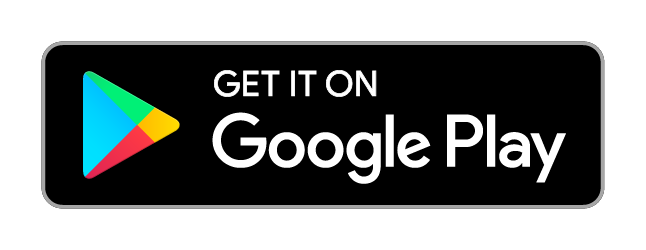

In [ ]:
Image("google-play-badge (1).png", width = 1000)

##     **DATA ANALYSING for play store data** 

In [ ]:
# CHECKING FOR NUMBER OF ROWS AND CLOUMNS IN APP DATFRAME
# Using shape : It gives number of rows and columns in a tuble
app_df.shape 

(10841, 13)

In [ ]:
# Using head(): It returns the first five data
app_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [ ]:
# Using tail(): It returns the last five data
app_df.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# CHECKING RANDOM RECORDS IN APP DATAFRAME
app_df.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10037,XE Currency Pro,TRAVEL_AND_LOCAL,4.4,1090,Varies with device,"10,000+",Paid,$1.99,Everyone,Travel & Local,"May 29, 2018",Varies with device,Varies with device
2875,InstaCam - Camera for Selfie,PHOTOGRAPHY,4.0,15098,10.0M,"1,000,000+",Free,0,Everyone,Photography,"March 3, 2017",1.43,2.3 and up
6212,Blur Image Background,PHOTOGRAPHY,3.9,129268,11M,"10,000,000+",Free,0,Everyone,Photography,"July 30, 2018",1.32,4.1 and up


In [ ]:
# Using info(): It informs about data columns and data types.
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# using nunique():returns the number of unique values for each column.
app_df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

From the above points, it can be noted that:

1. There are 9,660 apps provided in the data set with 12 types of information captured for each app
2. There are 34 unique categories that given apps belong to.
3. The apps have been developed for 33 versions of Android
4. There a total of 120 genres the apps have been classified into.





We can see that we have some missing values in the dataset. Lets have a detailed look of the missing values in the dataframe.



In [ ]:
# To know if there is any missing value or Nan value in the dataset, we can use the isnull() / insa() function.
app_df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

By diagnosing the data frame, we know that:


1. There are 13 columns of properties with 10841 rows of data.
2. From the above we can see that a row have a missing data for category column and all the prevailing column values is being replaced with its previous column. Better idea will we can make NaN category value
3. Column 'Reviews', 'Size', 'Installs' and 'Price' are in the type of 'object'.
4. Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.
5. Values of column 'Price' are strings representing price with symbol '$'.
6. Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.



#                                                         CLEANING DATA 

### 1.Column: Category

In [ ]:
app_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

1.9' is wrong value. So I have to see in which rows '1.9' corresponds to.

In [ ]:
app_df[app_df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We can make NaN category value. At that time we can get a clean data.


*   The loc operator is used to index a portion of the dataframe.
*   I used shift() method that is found Pandas library.




---



In [ ]:
app_df.loc[10472] = app_df.loc[10472].shift() #default value for shift is 1
app_df['App'].loc[10472] = app_df['Category'].loc[10472] 
app_df['Category'].loc[10472] = np.nan
app_df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

fillna is used to replaces the NULL values with a specified value.

In [ ]:
 app_df['Category'] = app_df['Category'].fillna(0)

### 2.Column: Rating

In [ ]:
app_df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [ ]:
app_df['Rating'].median()

4.3

since rating cant be 0. so this method cant be used

1. app_df['Rating'] = app_df['Rating'].fillna(0)
2. replacing the null values with median value of that entire 'Rating'
column where Median is: Median = {(n + 1) / 2}th value
3. converting the data type to float from object

In [ ]:
app_df['Rating'] =pd.to_numeric(app_df['Rating'])

In [ ]:
# finding the total number of null values in Rating column
app_df['Rating'].isnull().sum()

1474

In [ ]:
app_df['Rating'] = app_df['Rating'].fillna(app_df['Rating'].median())

In [ ]:
app_df['Rating'].isnull().sum()
app_df['Rating'].dtype

dtype('float64')

### 3.Column: Type

In [ ]:
# Let's have a look at the rows of the column Type having NULL values
app_df[app_df.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


1.  Since there is only one value missing in the Type column.
2.  So Now we can fill the missing value with Free

In [ ]:
 app_df['Type'] = app_df['Type'].fillna('Free')

In [ ]:
#finding NaN vaules in Reviews columns
app_df['Type'].isna().sum()

0

### 4.Column:Price

 1.  Values of column 'Price' are strings representing price with symbol '$'.
 2. change object to float type  





In [ ]:
app_df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
# We can remove the $ symbol from those values and change the to float
app_df['Price'] = app_df.Price.str.replace('$','').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
app_df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
app_df['Price'].unique().dtype

dtype('float64')

## 5.Column: Installs

1.  Values of column 'Installs' are strings representing install amount with symbols such as ',' and '+'.
2.  Data type of Size is object so we have to use 'str'



In [ ]:
app_df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [ ]:
app_df['Installs'] = app_df['Installs'].str.replace(',','')
app_df['Installs'] = app_df['Installs'].str.replace('+','')
app_df['Installs'] = app_df['Installs'].astype(float)
app_df["Installs"].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')

In [ ]:
app_df['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10841, dtype: float64

## 6.Column: Size

1.  Column 'Size' are in the type of 'object'.
2.  Values of column 'Size' are strings representing size in 'M' as Megabytes, 'k' as kilobytes and also 'Varies with devices'.
3. 1 megabyte = 1000 kilobytes


In [ ]:
app_df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
app_df['Size'] = app_df['Size'].str.replace("M","000")
app_df['Size'] = app_df['Size'].str.replace("k","")
app_df['Size'] = app_df['Size'].replace('Varies with device',np.nan)
app_df['Size'] = app_df['Size'].replace("1,000+","1000")
app_df['Size'] = app_df["Size"].astype(float)
app_df['Size'].dtype

dtype('float64')

In [ ]:
list(app_df['Size'].unique())

[19000.0,
 14000.0,
 8.7,
 25000.0,
 2.8,
 5.6,
 29000.0,
 33000.0,
 3.1,
 28000.0,
 12000.0,
 20000.0,
 21000.0,
 37000.0,
 2.7,
 5.5,
 17000.0,
 39000.0,
 31000.0,
 4.2,
 7.0,
 23000.0,
 6.0,
 6.1,
 4.6,
 9.2,
 5.2,
 11000.0,
 24000.0,
 nan,
 9.4,
 15000.0,
 10000.0,
 1.2,
 26000.0,
 8.0,
 7.9,
 56000.0,
 57000.0,
 35000.0,
 54000.0,
 201.0,
 3.6,
 5.7,
 8.6,
 2.4,
 27000.0,
 2.5,
 16000.0,
 3.4,
 8.9,
 3.9,
 2.9,
 38000.0,
 32000.0,
 5.4,
 18000.0,
 1.1,
 2.2,
 4.5,
 9.8,
 52000.0,
 9.0,
 6.7,
 30000.0,
 2.6,
 7.1,
 3.7,
 22000.0,
 7.4,
 6.4,
 3.2,
 8.2,
 9.9,
 4.9,
 9.5,
 5.0,
 5.9,
 13000.0,
 73000.0,
 6.8,
 3.5,
 4.0,
 2.3,
 7.2,
 2.1,
 42000.0,
 7.3,
 9.1,
 55000.0,
 23.0,
 6.5,
 1.5,
 7.5,
 51000.0,
 41000.0,
 48000.0,
 8.5,
 46000.0,
 8.3,
 4.3,
 4.7,
 3.3,
 40000.0,
 7.8,
 8.8,
 6.6,
 5.1,
 61000.0,
 66000.0,
 79.0,
 8.4,
 118.0,
 44000.0,
 695.0,
 1.6,
 6.2,
 18.0,
 53000.0,
 1.4,
 3.0,
 5.8,
 3.8,
 9.6,
 45000.0,
 63000.0,
 49000.0,
 77000.0,
 4.4,
 4.8,
 70000.0,
 6.9,
 9.

In [ ]:
app_df["Size"].isnull().sum()

1695

 REPLACING THE NAN VALUES with 0





In [ ]:
app_df["Size"] = app_df["Size"].fillna(0)

In [ ]:
app_df["Size"].isnull().sum()

0

## 7.Column: Content Rating

In [ ]:
app_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [ ]:
app_df['Content Rating'].isnull().sum()

0

## 8.Column: Reviews columns

finding NaN vaules in Reviews columns

In [ ]:
app_df['Reviews'].isna().sum()

0

since there are no null values in Reviews Column, data type can be converted to float from object

In [ ]:
app_df['Reviews'] = (app_df['Reviews']).astype(float)        
app_df['Reviews'].dtype

dtype('float64')

                                 ---------------**``Now we are done with the Data Preparation and Cleaning``**------------------

# **Exploratory Data Analysis**

Exploratory data analysis popularly known as EDA.  

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Let's begin by importing matplotlib.pyplot and seaborn.

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## 1. Category

In [ ]:
app_df["Category"].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
0                         1
Name: Category, dtype: int64


1. Can we see all the categories from the Category column.
2. value_counts() function returns object containing counts of unique values.
3. countplot() method is used to Show the counts of observations in each categorical bin using bars 
4. The figure() module provides the top-level Artist, the Figure, which contains all the plot elements
5. sns.set() is used to customize seaborn theme or use one of six variations of the default theme. Which are called deep, muted, pastel, bright, dark, and colorblind.
6.  xticks() function used to get and set the current tick locations and labels of the x-axis.

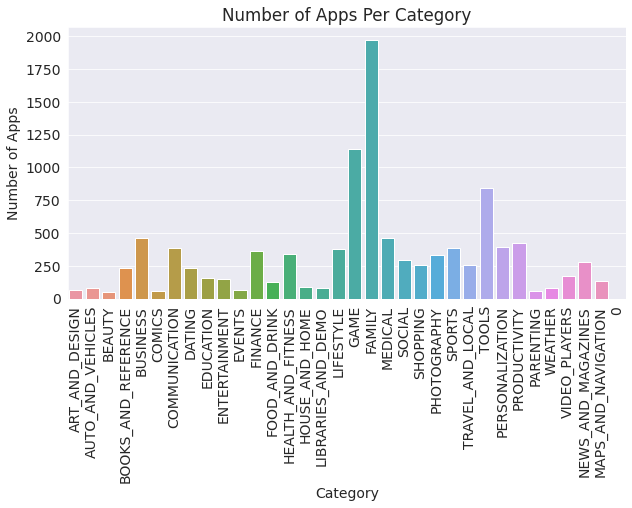

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.countplot(x="Category" , data=app_df)
plt.title("Number of Apps Per Category")
plt.xticks(rotation=90)
plt.ylabel("Number of Apps")
plt.show()

So there are all total 33 categories in the dataset From the above output we can come to a conclusion that in playstore most of the apps are under Family & Game category and least are of Beauty & Comics Category.

## 2. Category and Installs

get the number of installs for each category

Text(0.5, 1.0, 'App Category Vs Installs')

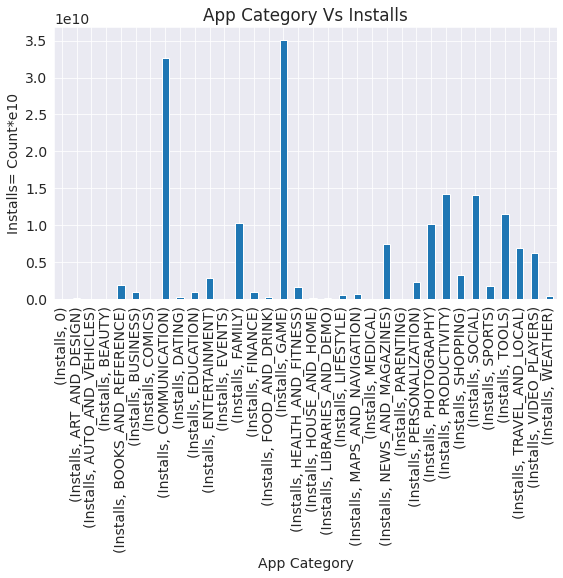

In [ ]:
grouped_category= app_df.groupby('Category')
category_installs= grouped_category[['Installs']].sum().unstack() # unstake it returns a DataFrame having a new level of column labels.
category_installs.plot(kind='bar')
plt.xlabel('App Category')
plt.ylabel('Installs= Count*e10')
plt.title('App Category Vs Installs')

From this distribution plotting of number of installs for each category, we can see that most of the apps being downloaded and installed are from the categories of 'Game' and 'Communication'.

## 3. CONTENT RATING

 Which category of Apps from the Content Rating column are found more on playstore

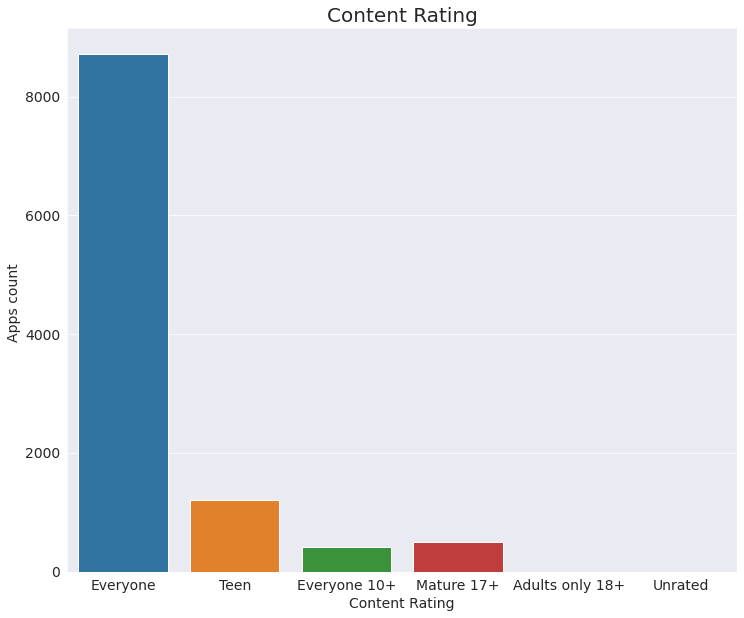

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,10))
sns.countplot(x="Content Rating" , data=app_df)
plt.title("Content Rating" , size = 20)
plt.ylabel("Apps count ")
plt.show()

From the above plot we can see that Everyone category has the highest number of apps.

## 4. Application Type

Let's plot a visualization graph to view what portion of the apps in playstore are paid and free

1.   The start angle of the pie slices in degrees where 0 is top and 90 right. Defaults to 0 .
2.  explode function in  pie chart means to make one of the wedges of the pie chart to stand out.



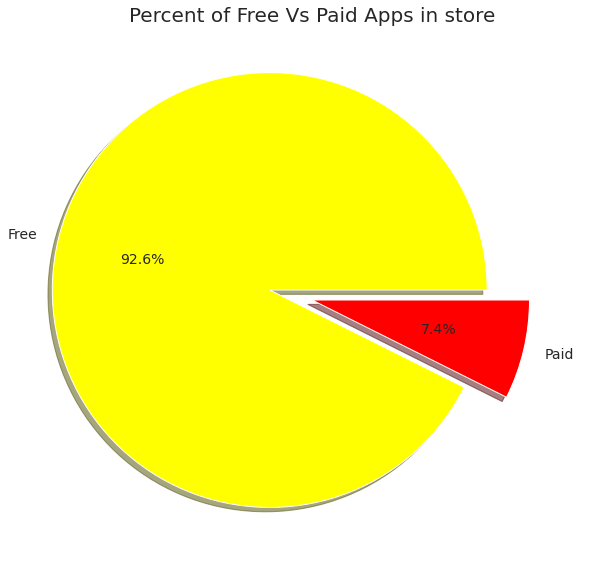

In [ ]:
plt.figure(figsize=(10,10))
labels = app_df['Type'].value_counts(sort = True).index
sizes = app_df['Type'].value_counts(sort = True)
colors = ["yellow","red"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0) 
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

From the above graph we can see that 92%(Approx.) of apps in google play store are free and 8%(Approx.) are paid.

### 5. Correlation Matrix

1. describe (): It returns number of entries, average of entries, outlier values, standart deviation, minimum and maximum entry.
2. corr() : It returns correlation.

In [ ]:
app_df.describe()

,Rating,Reviews,Size,Installs,Price
count,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000
mean,4.206263,4.441119e+05,16516.354405,1.546291e+07,1.027273
std,0.480830,2.927629e+06,23198.714729,8.502557e+07,15.948971
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,3.100000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,266.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,26000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [ ]:
app_df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.063166,0.039940,0.045528,-0.019269
Reviews,0.063166,1.000000,0.072371,0.643123,-0.009666
Size,0.039940,0.072371,1.000000,0.008272,-0.014651
Installs,0.045528,0.643123,0.008272,1.000000,-0.011688
Price,-0.019269,-0.009666,-0.014651,-0.011688,1.000000


1. annot – an array of the same shape as data which is used to annotate the heatmap
2. fmt is a single formatting string it applies to all elements in the array (1D or 2D input array)
3. 2f (note the f ) means to display the number with two digits after the decimal point

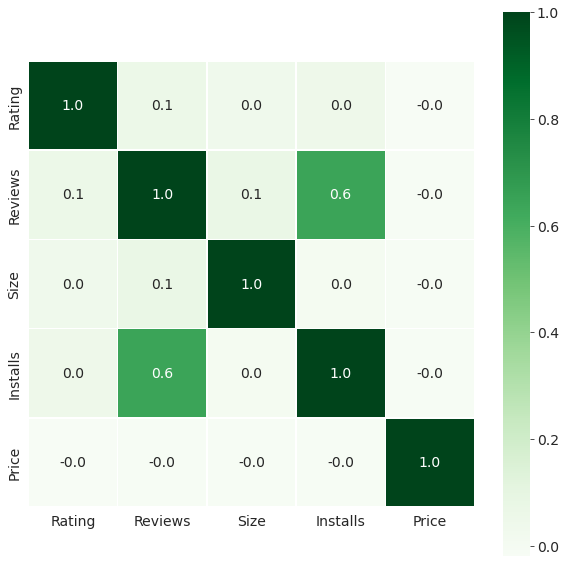

In [ ]:
#correlation map
fig,axes = plt.subplots(figsize=(10, 10))
sns.heatmap(app_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=axes,square=True,cmap='Greens')
plt.show()

# Sentiment Analysis 

Sentiment analysis studies the subjective information in an expression, that is, the opinions, appraisals, emotions, or attitudes towards a topic, person or entity. Expressions can be classified as positive, negative, or neutral. 

In [ ]:
from google.colab import files
from IPython.display import Image
uploaded =files.upload()

Saving Sentiment-Analysis.jpg to Sentiment-Analysis.jpg


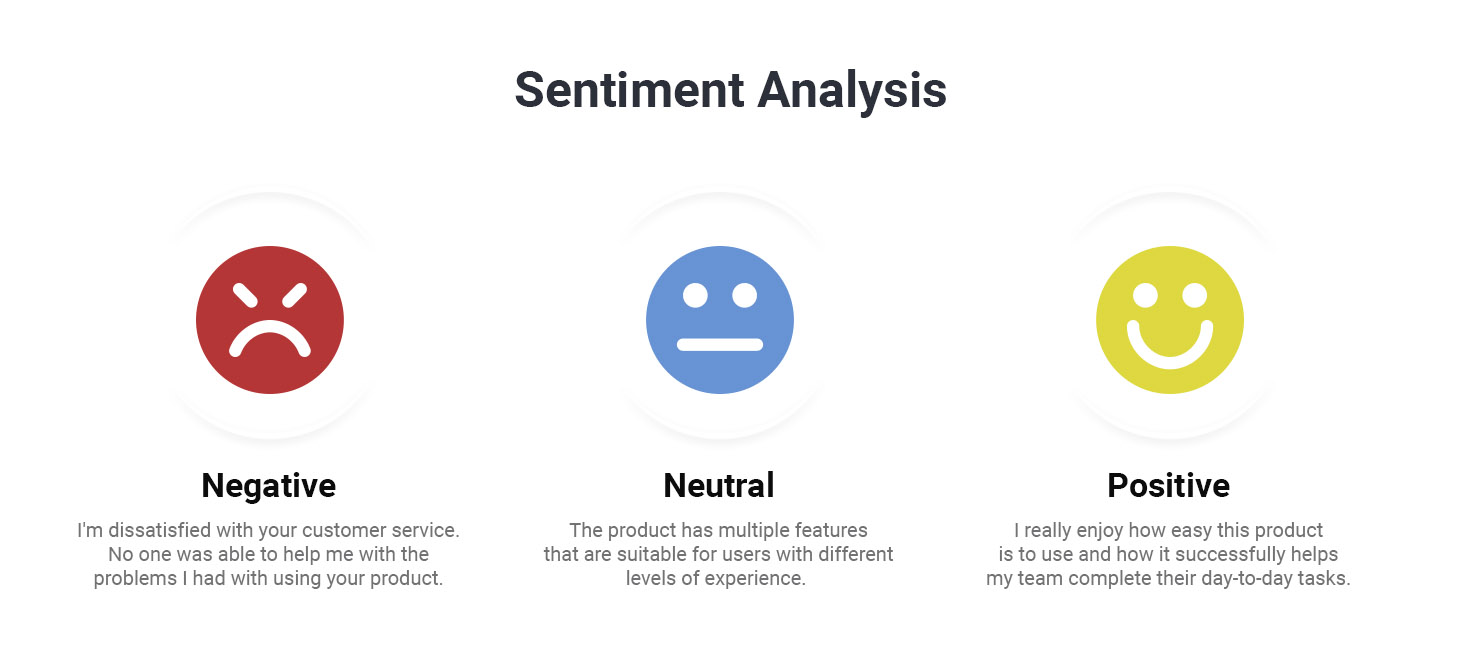

In [ ]:
Image("Sentiment-Analysis.jpg", width = 1200)

# data analysisng for user review

CHECKING FOR NUMBER OF  ROWS AND COLUMNS IN USER_REVIEWS

In [ ]:
# Using shape : It gives number of rows and columns in a tuble
user_reviews.shape

(64295, 5)

In [ ]:
user_reviews.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


In [ ]:
user_reviews.tail(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
# CHECKINH THE INFO OF USER_REVIEWS DATAFRAME
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# using nunique():returns the number of unique values for each column.
user_reviews.nunique()

App                        1074
Translated_Review         27994
Sentiment                     3
Sentiment_Polarity         5410
Sentiment_Subjectivity     4474
dtype: int64

In [ ]:
# To know if there is any missing value or Nan value in the dataset, we can use the isnull() / insa() function.
user_reviews.isna().count()

App                       64295
Translated_Review         64295
Sentiment                 64295
Sentiment_Polarity        64295
Sentiment_Subjectivity    64295
dtype: int64

We can see that we have some missing values in the dataset. Lets have a detailed look of the missing values in the dataframe.

 **user_reviews dataframe has 64295 rows and 5 columns.**

**Description of Columns**:

1. **App**:- contains all the details of the applications on user_reviews dataframe.
2. **Translated_Review**:- It contains the review dropped by the user of the app.
3. **Sentiment**:- It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
4. **Sentiment_Polarity**:- It gives the polarity of the review ranges from -1 to 1.
5. **Sentiment_Subjectivity**:-Provides the relevance of the reviewer with respect to the app, the output lies within [0,1] and refers to personal opinions and judgments.

# **DATA CLEANING**

dropna() function is used to remove rows and columns with Null/NaN values.


In [ ]:
user_reviews.dropna(inplace=True)

In [ ]:
user_reviews.isna().value_counts()

App    Translated_Review  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity
False  False              False      False               False                     37427
dtype: int64

In [ ]:
user_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


### 1.COLUMN: SENTIMENT

In [ ]:
user_reviews['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

cross checking the null values

In [ ]:
user_reviews['Sentiment'].isnull().sum()

0

### 2.COLUMN: TRANSLATED_REVIEW

 checking the NaN values in the translated rview column

In [ ]:
user_reviews[user_reviews["Translated_Review"].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity


### 3. COLUMN: SENTIMENT_POLARITY

In [ ]:
user_reviews['Sentiment_Polarity'].unique()

array([ 1.        ,  0.25      ,  0.4       , ..., -0.52857143,
       -0.37777778,  0.17333333])

notna() function detects existing/ non-missing values in the dataframe.

In [ ]:
user_reviews[user_reviews['Sentiment_Polarity'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


The values in the Sentiment_Polarity looks correct.
We have sucessfully cleaned the dirty data. 
Now we can perform some data visualization and come up with insights on the given datasets.

# **Data Visualization on user review**

Data visualization provides a good, organized pictorial representation of the data which makes it easier to understand, observe, analyze.

## 1. Correlation Heatmap

Let us check if there is any co-relation in both the dataframes.

In [ ]:
merged_df = pd.merge(app_df, user_reviews, on='App', how = "inner")

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72605 entries, 0 to 72604
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     72605 non-null  object 
 1   Category                72605 non-null  object 
 2   Rating                  72605 non-null  float64
 3   Reviews                 72605 non-null  float64
 4   Size                    72605 non-null  float64
 5   Installs                72605 non-null  float64
 6   Type                    72605 non-null  object 
 7   Price                   72605 non-null  float64
 8   Content Rating          72605 non-null  object 
 9   Genres                  72605 non-null  object 
 10  Last Updated            72605 non-null  object 
 11  Current Ver             72605 non-null  object 
 12  Android Ver             72605 non-null  object 
 13  Translated_Review       72605 non-null  object 
 14  Sentiment               72605 non-null

In [ ]:
merged_df.corr()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.129660,0.058390,-0.002742,-0.013274,0.051951,0.057076
Reviews,0.129660,1.000000,0.309408,0.520766,-0.030794,-0.107390,-0.018063
Size,0.058390,0.309408,1.000000,0.053414,0.006226,-0.123482,0.016677
Installs,-0.002742,0.520766,0.053414,1.000000,-0.033153,-0.060528,-0.010398
Price,-0.013274,-0.030794,0.006226,-0.033153,1.000000,0.028077,0.007643
Sentiment_Polarity,0.051951,-0.107390,-0.123482,-0.060528,0.028077,1.000000,0.227486
Sentiment_Subjectivity,0.057076,-0.018063,0.016677,-0.010398,0.007643,0.227486,1.000000


**Correlation heatmap**


Text(0.5, 1.0, ' Heatmap for merged Dataframe')

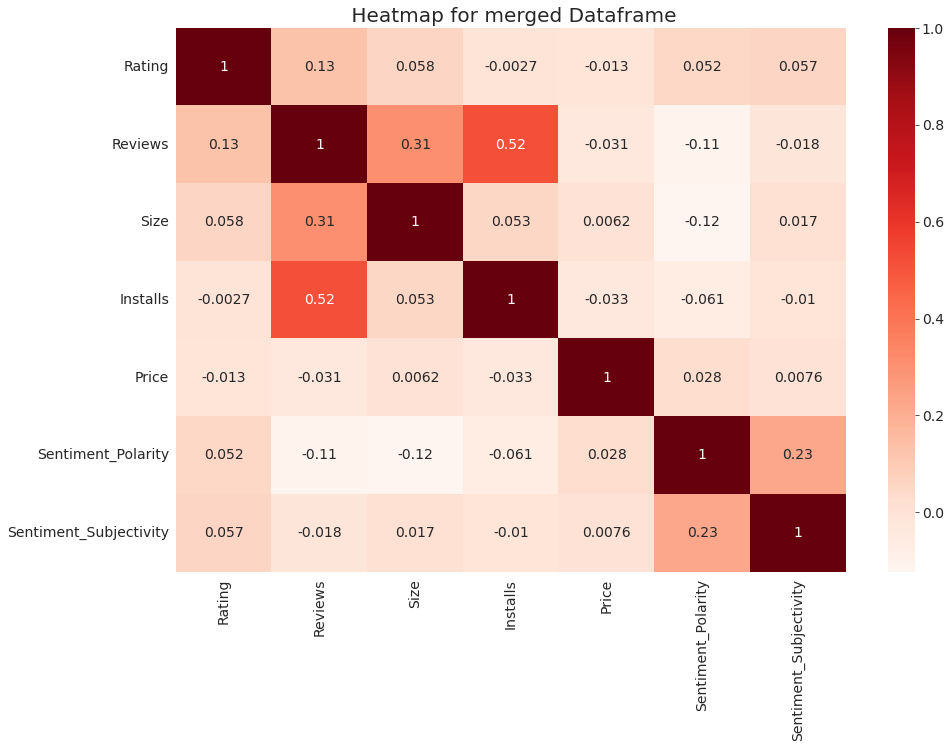

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(merged_df.corr(), annot= True, cmap='Reds')
plt.title(' Heatmap for merged Dataframe', size=20)

## 2. sentiment_subjectivity corresponding to sentiment_polarity

scatterplot of sentiment polarity and sentiment subjectivity.

1.  Hue parameter take column name for colour encoding.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


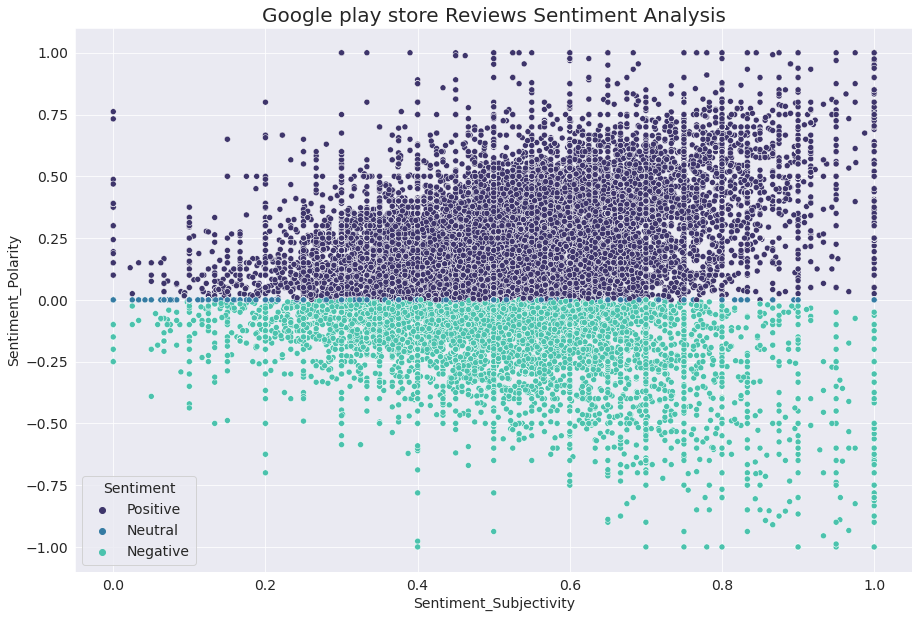

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(user_reviews["Sentiment_Subjectivity"],user_reviews["Sentiment_Polarity"],
                hue = user_reviews["Sentiment"],edgecolor = "white" , palette = "mako")
plt.title("Google play store Reviews Sentiment Analysis" , fontsize=20)
plt.show()

From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity


**Summary**

So this is how we can analyze the sentiments of google play store reviews. Sentiment analysis is the classification of a customer’s reviews or comments as positive, negative, and neutral. 

# Asking and Answering Questions

With the help of Data Analysis, we can answer to many questions which can't be answerd just by looking at the dataset. By querying on the dataset, and understanding the pattern and rate of growth and fall of any values we can come to many conclusions, and get insightfull information from it.



### 1. Type of apps most downloaded




Lets see which type of app has been downloaded the most

In [ ]:
app_type = app_df.groupby("Type")[["Installs"]].sum().unstack()
app_type

          Type
Installs  Free    1.675605e+11
          Paid    7.295608e+07
dtype: float64

Hence, Free apps have the highest number of installs

### 2. Costliest app

checking the value of costliest_app

In [ ]:
costliest_app = app_df.sort_values(by = "Price", ascending = False)
costliest_app

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.3,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,2.7,1000.0,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,41000.0,1000.0,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8.7,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
4197,most expensive app (H),FAMILY,4.3,6.0,1.5,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,Storm Radar: Tornado Tracker & Hurricane Alerts,WEATHER,4.6,89868.0,0.0,1000000.0,Free,0.00,Everyone,Weather,"June 12, 2018",Varies with device,Varies with device
3654,Yandex.Weather,WEATHER,4.5,309617.0,0.0,10000000.0,Free,0.00,Everyone,Weather,"July 23, 2018",Varies with device,Varies with device
3655,Local Weather Forecast & Visual Widget,WEATHER,4.5,3478.0,6.1,500000.0,Free,0.00,Everyone,Weather,"August 2, 2018",2.9.10,4.2 and up
3656,Wetter by t-online.de,WEATHER,4.2,24349.0,9.2,1000000.0,Free,0.00,Everyone,Weather,"May 14, 2018",1.8.4.5,4.1 and up


In [ ]:
costliest_app["App"].head(1), costliest_app["Price"].head(1)

(4367    I'm Rich - Trump Edition
 Name: App, dtype: object, 4367    400.0
 Name: Price, dtype: float64)

Hence costliest app is I'm Rich - Trump Edition with price of 400$

### 3.  Which are the top 10 expensive Apps in playstore?

In [ ]:
# creating DataFrame for paid apps
top10 = app_df[app_df['Type'] == "Paid"].sort_values(by = "Price", ascending = False). head(10)
#  creating DataFrame for top 10 paid apps
top10_paid_apps = top10[['Installs', "App"]].drop(9934)
top10_paid_apps

,Installs,App
4367,10000.0,I'm Rich - Trump Edition
5359,5000.0,I am rich(premium)
5373,1000.0,I AM RICH PRO PLUS
5354,10000.0,I am Rich Plus
5351,100000.0,I am rich
5358,1000.0,I am Rich!
5362,5000.0,I Am Rich Pro
4362,10000.0,💎 I'm rich
5364,1000.0,I am rich (Most expensive app)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


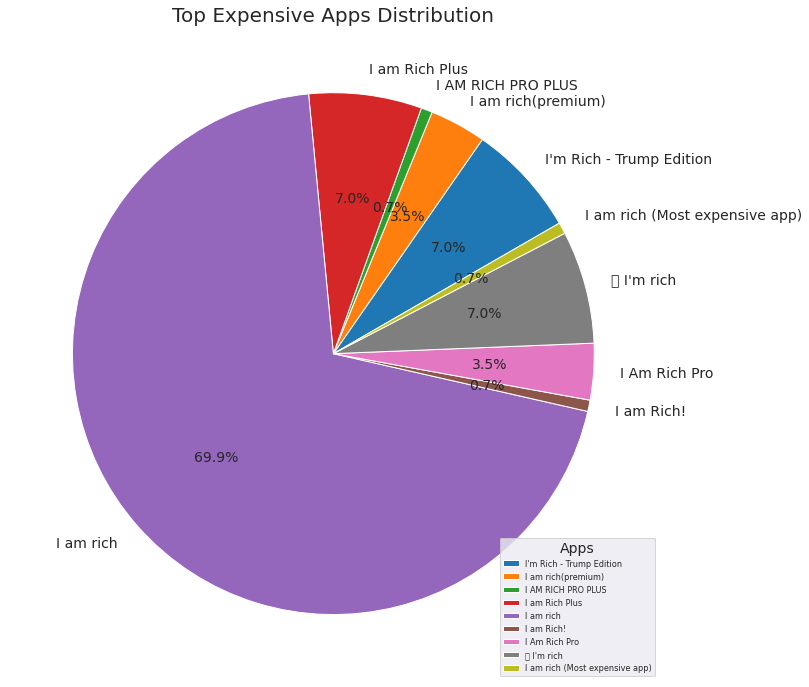

In [ ]:
# ploting pie chart 
plt.figure(figsize=(15,12));
plt.pie(top10_paid_apps.Installs, explode=None, labels=top10_paid_apps.App, autopct='%1.1f%%', startangle=30);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10_paid_apps.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

 From the above graph we can interprete that the App `I am rich` is the most expensive app in the google playstore followed by `I am Rich Premium`. we also had to drop one row data for this visualization because the language of the app was `Chinese` and it was messing with the pie chart, visualization.

## 4. What are the Top 10 installed apps in sports category?

In [ ]:
def findtop10incategory(str):
    str = str.upper()
    top10 = app_df[app_df['Category'] == str]               # Creating a df 
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(15,10))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 35, horizontalalignment='right');

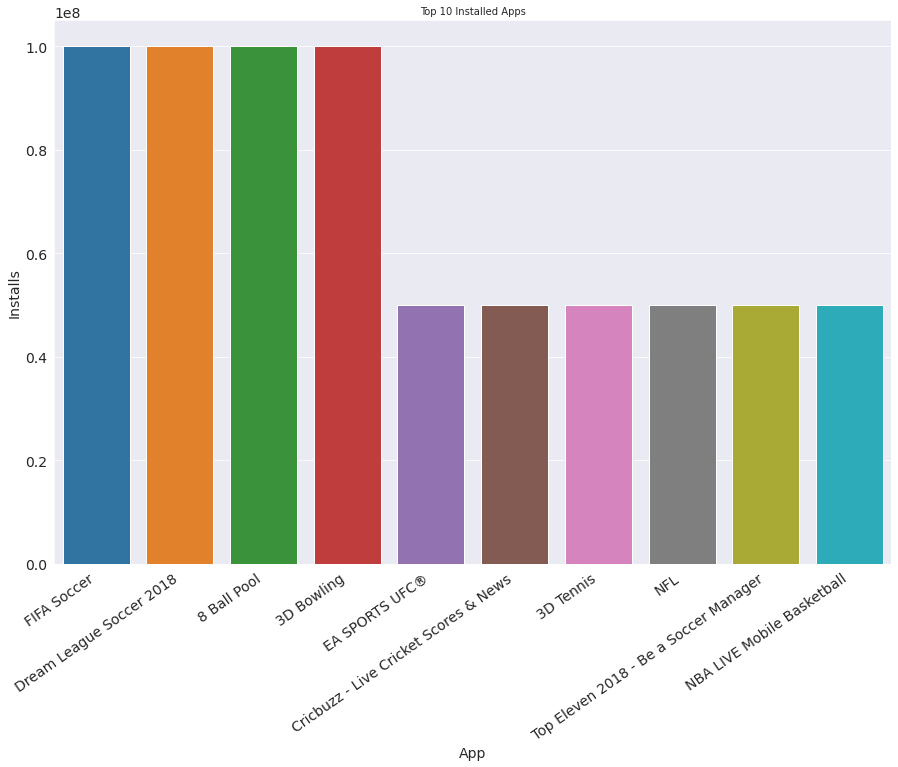

In [ ]:
findtop10incategory('Sports')

From the above graph we can see that in the Sports category FIFA Soccer, and Dream League Soccee 2018 has the highest installs. In the same way we by passing different category names to the function, we can get the top 10 installed apps.

## 5. What are the count of Apps in different genres?

In [ ]:
apps_in_Genres = app_df['Genres'].value_counts().head(50)
apps_in_Genres

Tools                          842
Entertainment                  623
Education                      549
Medical                        463
Business                       460
Productivity                   424
Sports                         398
Personalization                392
Communication                  387
Lifestyle                      381
Finance                        366
Action                         365
Health & Fitness               341
Photography                    335
Social                         295
News & Magazines               283
Shopping                       260
Travel & Local                 257
Dating                         234
Books & Reference              231
Arcade                         220
Simulation                     200
Casual                         193
Video Players & Editors        173
Puzzle                         140
Maps & Navigation              137
Food & Drink                   127
Role Playing                   109
Strategy            

In [ ]:
x3sis = []
y3sis = []

for i in range(len(apps_in_Genres)):
    x3sis.append(apps_in_Genres.index[i])
    y3sis.append(apps_in_Genres[i])

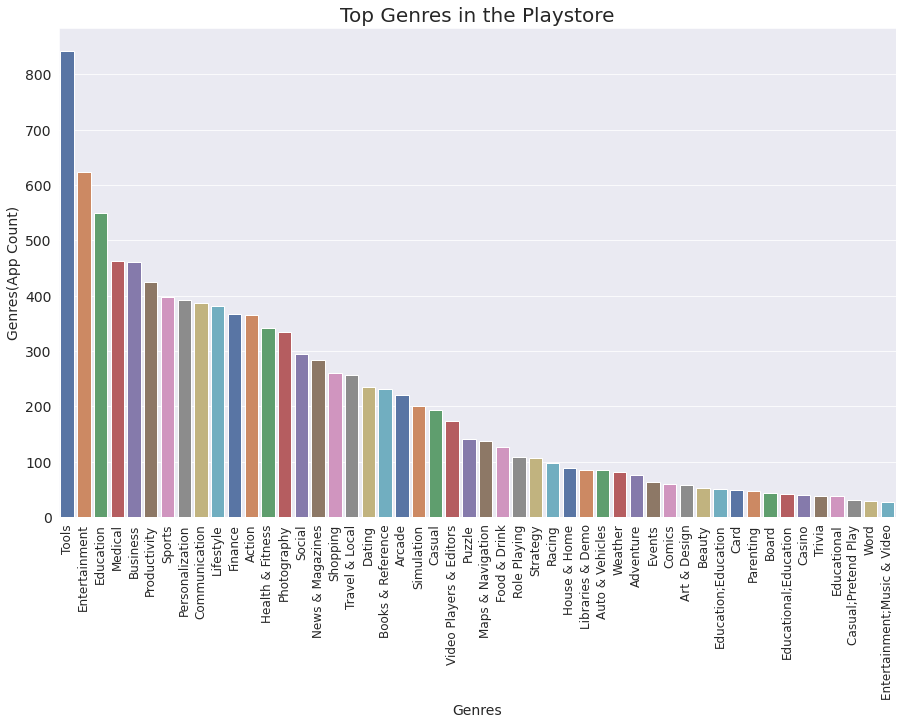

In [ ]:
plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=x3sis,y=y3sis,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

From the above visualization we can see that the Highest Number of Apps found in the `Tools` and `Entertainment` genres followed by `Education`, `Medical` and many more.

## 6.Percentage of Review Sentiments

In [ ]:
user_reviews.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

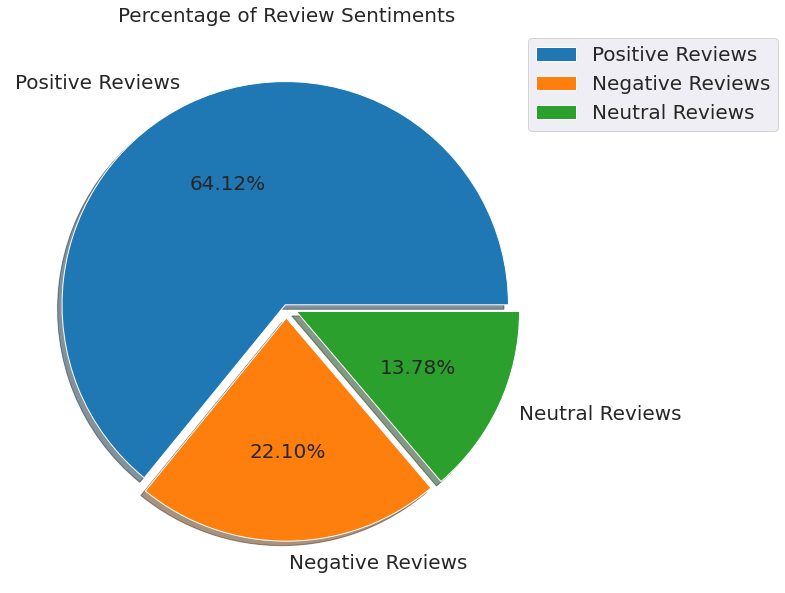

In [ ]:
counts = list(user_reviews['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (10, 15)
plt.pie(counts, labels=labels, explode=[0.01, 0.05, 0.05], shadow=True, autopct="%.2f%%")
plt.title('Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend(bbox_to_anchor=(0.9, 0, 0.5, 1))
plt.show()

from the above pie chart it can be observed that:
1. Positive reviews are 64.30%
2. Negative reviews are 22.80%
3. Neutral reviews are 12.90%

## 7. Apps with the highest number of positive reviews

In [ ]:
# Positive reviews
positive_reviews = user_reviews[user_reviews['Sentiment'] == 'Positive']
positive_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


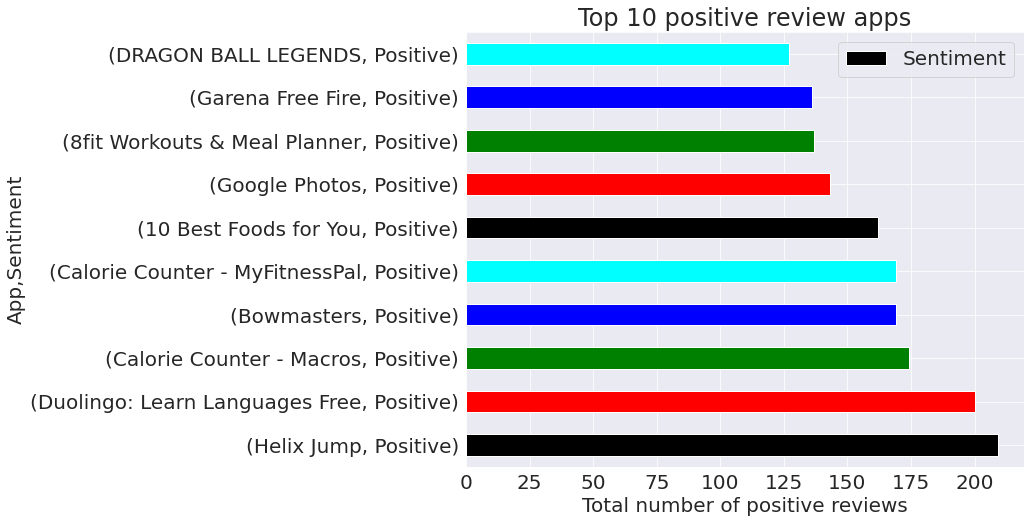

In [ ]:
#  groupby App and Sentements to find positive reviews.
positive_reviews.groupby("App")["Sentiment"].value_counts().nlargest(10).plot.barh(figsize = (10,8), color =['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

## 8. Apps with the highest number of negative reviews.

In [ ]:
# negaticve reviews
negative_reviews = user_reviews[user_reviews['Sentiment'] == 'Negative']
negative_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


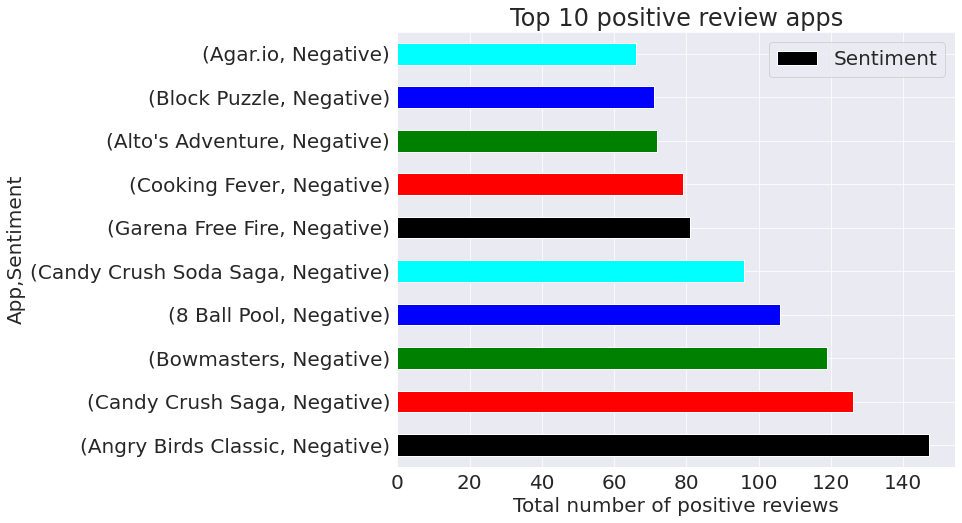

In [ ]:
#  groupby App and Sentements to find negative reviews.
negative_reviews.groupby("App")["Sentiment"].value_counts().nlargest(10).plot.barh(figsize = (10,8), color =['black', 'red', 'green', 'blue', 'cyan'])
plt.title("Top 10 positive review apps")
plt.xlabel('Total number of positive reviews')
plt.legend()

#  Conclusion

After Analyzing the dataset I have got answers to some of the serious & interesting question which any of the android users would love to know.
1. *Type of apps most downloaded*
2. *Type of apps most downloaded*
3. Which are the top 10 expensive Apps in playstore?
4. *What are the Top 10 installed apps in any category?*
5. *What are the count of Apps in different genres?*
6. *Percentage of Review Sentiments.*
7. *Apps with the highest number of positive reviews*.
8. *Apps with the highest number of negative reviews.*

After the completion of my project and the course I have learned and got exposure to different tools and techniques in data analysis. I was able to complete the project successfully with the help of tools like Python, Pandas, Matplotlib, Numpy and Seaborn. Also I learned different techniques like Data Cleaning, Data Preparation, Data Exploration and visualization, and Data Interpretation